# RhizoScan Pipeline

This pipeline is a step by step pipeline

## Common import

In [1]:
from __future__ import absolute_import

In [2]:
%pylab notebook
from matplotlib import pyplot as plt
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


## RhizoScan Import

In [3]:
from rhizoscan import get_data_path
from rhizoscan.root.pipeline import load_image, detect_petri_plate, compute_graph, compute_tree
from rhizoscan.root.pipeline.arabidopsis import segment_image, detect_leaves, _detect_leaves
from rhizoscan.root.graph.mtg import tree_to_mtg
from rhizoscan.root.image.seed import _cluster_seed

## RSA Image

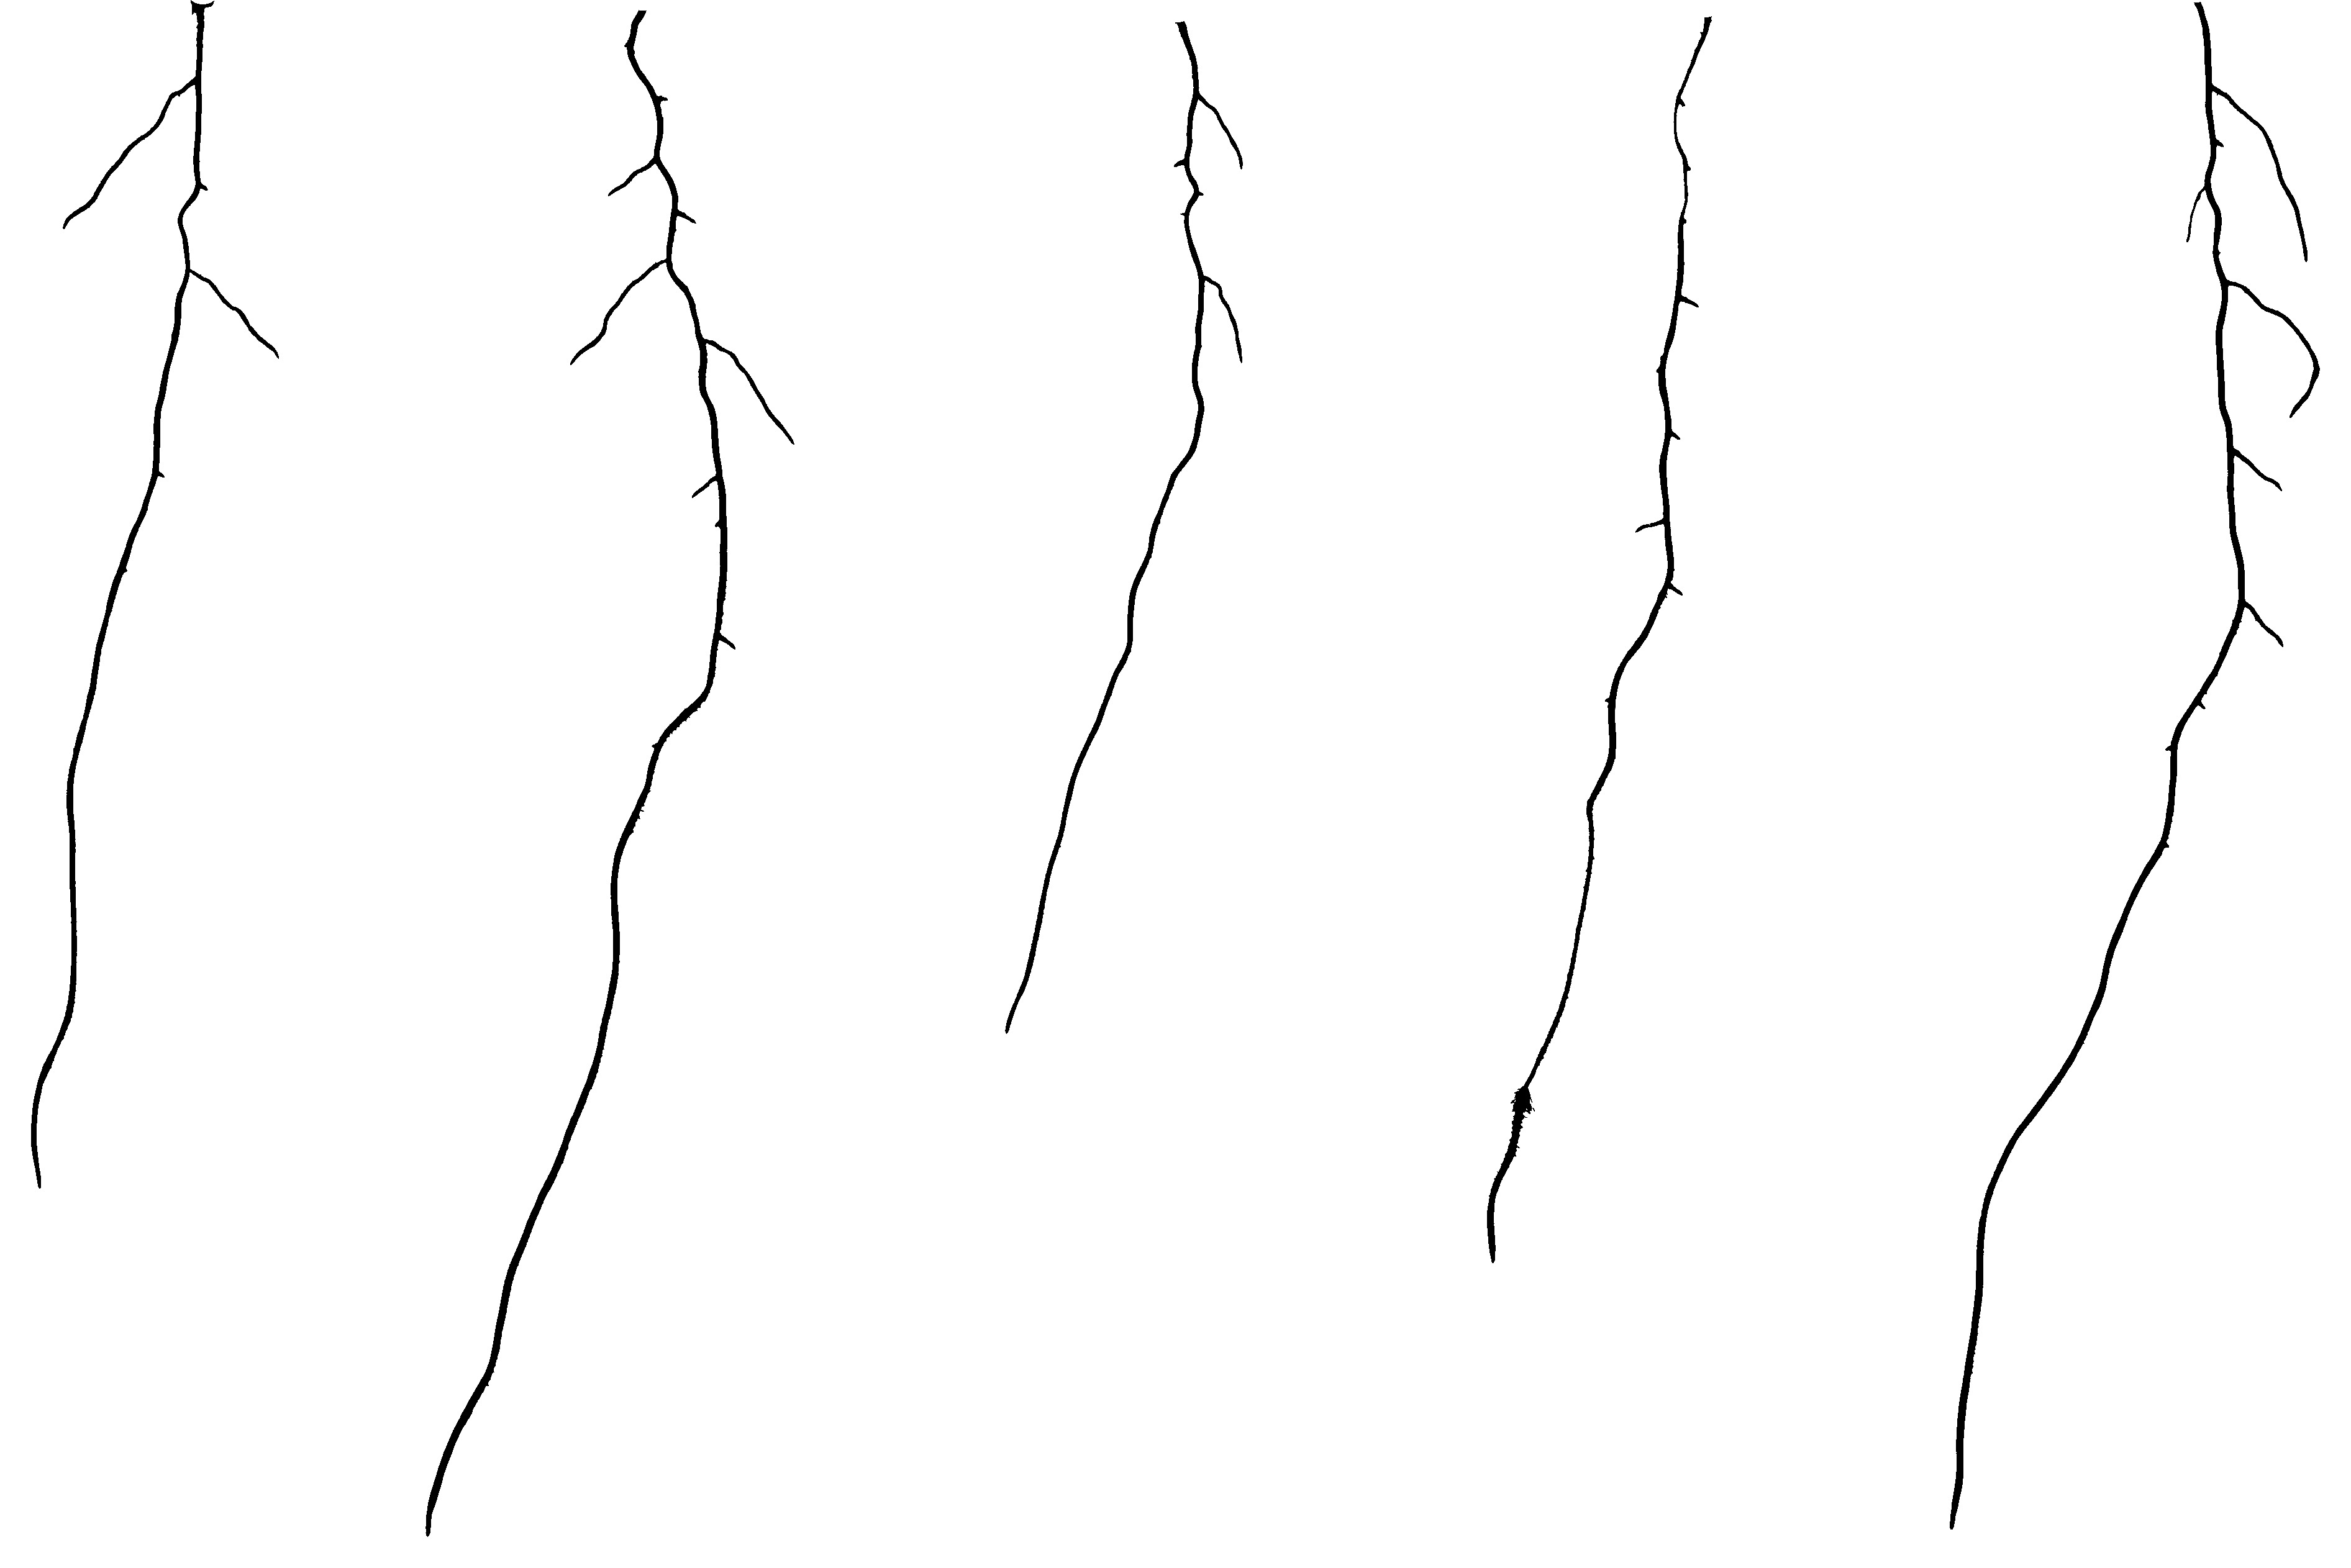

In [4]:
image_filename ='C:/Users/FORTFER/Desktop/image_test.jpg'
#image_filename = ''
Image(image_filename)


### Load Image

<IPython.core.display.Javascript object>


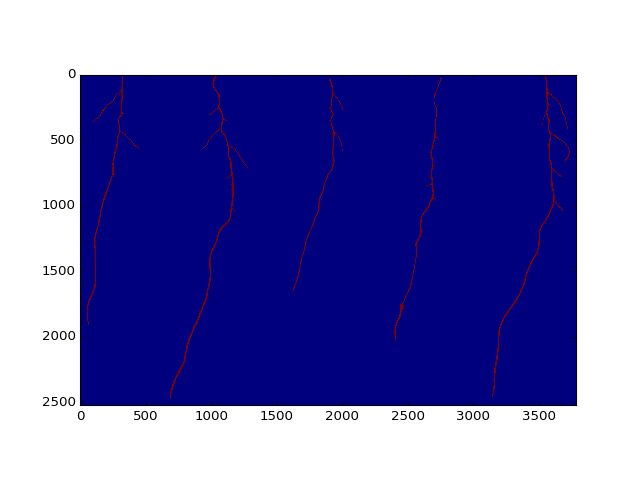

In [5]:
image = load_image(image_filename)
imshow(image)

### Detect features (Petri plate)

In [ ]:
#pmask, px_scale, hull = detect_petri_plate(image,border_width=25, plate_size=120, fg_smooth=1)
#imshow(pmask)
#pmask = image.copy()
detect_petri_plate??

### Image Segmentation

In [6]:
rmask, bbox = segment_image(image)
#imshow(rmask)

### Detect leaves and seed

In [ ]:
#seed_map = detect_leaves(rmask, image, bbox, plant_number=5, leaf_bbox=[0,0,1,.4])
#imshow(seed_map)
#imshow(seed_map)
_detect_leaves??

<IPython.core.display.Javascript object>


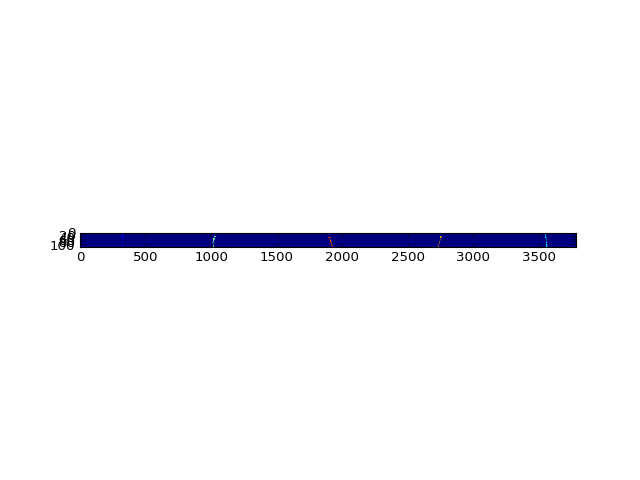

In [8]:
from skimage.measure import label, regionprops
#from skimage.color import label2rgb

label_image, nb_label= label(image[0:100,:], return_num=True)

regions = regionprops(label_image)
imshow(label_image)

In [9]:
reg = regions[0]
regions = [reg for reg in regions if reg.area > 50]
print(len(regions))

5


<IPython.core.display.Javascript object>


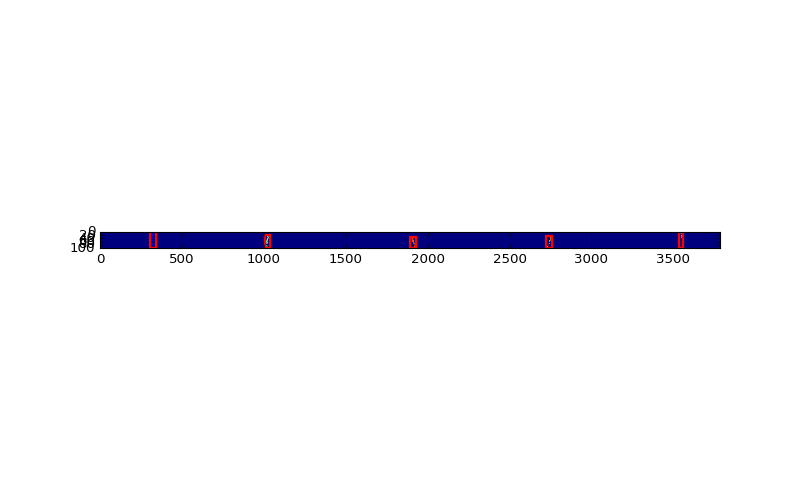

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(label_image)

<IPython.core.display.Javascript object>


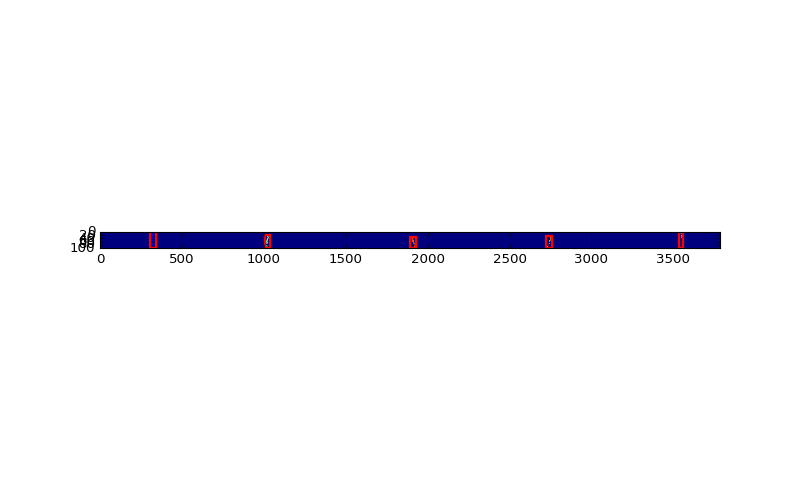

In [12]:
import matplotlib.patches as mpatches


for region in regions:
    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
fig

In [ ]:
_cluster_seed??

### Compute the graph corresponding to the RSA

In [ ]:
from skimage.morphology import skeletonize
skeletonize??

In [ ]:
graph = compute_graph(rmask,None,bbox)
graph.plot(linewidth=4)

### Extract a tree from the graph

In [ ]:
tree = compute_tree(graph, px_scale=px_scale)
tree.plot(linewidth=4)

### Save the RSA into an MTG

In [ ]:
g = rsa = tree_to_mtg(tree)
g.display()